In [201]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [202]:
df = pd.read_csv('../datasets/df_after_one_hot_encoding.csv')
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**There are several observations made in the real estate world:**
- Ensure each BHK has at least 225 sqft. So, the total minimum area for a house should be 225×BHK.
- The number of bathrooms should not exceed BHK + 1.
- Since the primary focus is on 2BHK and 3BHK homes, filter out any other configurations.
- Assuming the price_per_sqft column follows a normal distribution, identify and remove outliers using statistical methods.
- Remove higher BHK homes that are priced lower than similar lower BHK homes in the same location.

In [203]:
df = df[((df['total_sqft'] / (df['BHK'])) >= 225) & ~(df['BHK'] == 0)]

In [204]:
df.shape

(12703, 245)

In [205]:
df = df[df['bath'] <= (df['BHK'] + 1)]

In [206]:
df.shape

(12543, 245)

In [207]:
bhk_counts = df['BHK'].value_counts()

In [208]:
bhk_filtered = bhk_counts[bhk_counts > 100]

In [209]:
bhk_values = bhk_filtered.index

In [210]:
bhk_list = bhk_values.tolist()

In [211]:
bhk_list

[2, 3, 4, 1, 5, 6]

In [212]:
df = df[df['BHK'].isin(bhk_list)]

In [213]:
df.sample(10)

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6392,4000.0,4.0,1000.00,5,25000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2674,2289.0,3.0,260.00,3,11358.671909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8063,620.0,2.0,48.00,1,7741.935484,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3596,4428.0,4.0,255.00,4,5758.807588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8022,1259.0,2.0,67.48,2,5359.809373,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5743,1082.0,3.0,50.00,3,4621.072089,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13106,520.0,1.0,14.04,1,2700.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9342,7500.0,5.0,1500.00,5,20000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5792,2400.0,2.0,480.00,3,20000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2365,1100.0,2.0,52.00,2,4727.272727,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


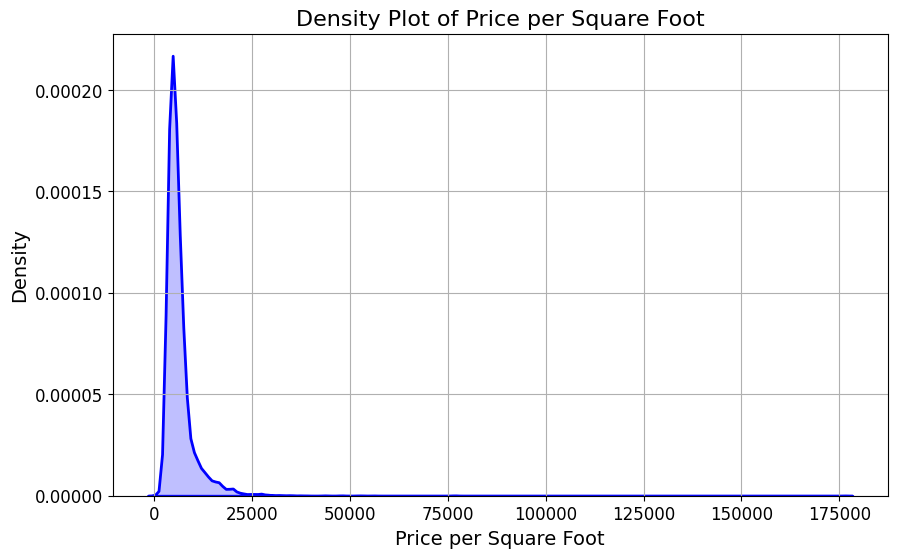

In [214]:
plt.figure(figsize=(10, 6))
kde_plot = sns.kdeplot(data=df, x='price_per_sqft', color='blue', fill=True, linewidth=2)

plt.title('Density Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [215]:
df['price_per_sqft'].describe()

count     12441.000000
mean       6334.661328
std        4140.173483
min         267.829813
25%        4211.469534
50%        5300.000000
75%        6956.136464
max      176470.588235
Name: price_per_sqft, dtype: float64

In [216]:
import statsmodels.api as sm

<Figure size 1000x600 with 0 Axes>

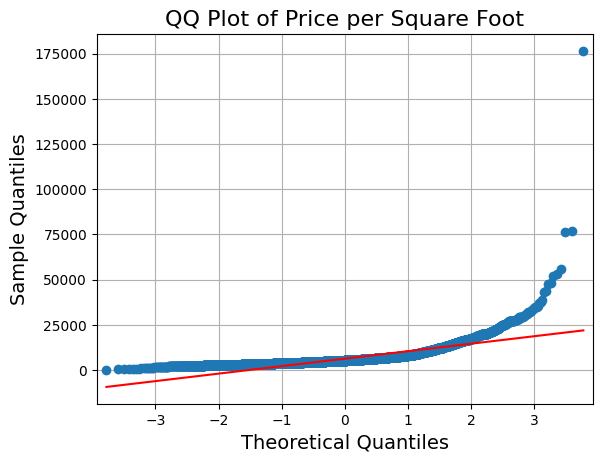

In [217]:
plt.figure(figsize=(10, 6))
qq_plot = sm.qqplot(df['price_per_sqft'], line='s')

plt.title('QQ Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)

plt.show()

**The KDE Plot shows that the data is right-skewed.**

**The QQ Normal Plot shows that the data is normally distributed but is right skewed.**

**There are 2 ways in tackling these outliers :**
- Outliers based on interquartile range.
- Keep data with the range of mean + standard deviation.
- We have used the first method.

In [218]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

In [219]:
IQR = Q3 - Q1

In [220]:
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

Q1 (25th percentile): 4211.469534050179
Q3 (75th percentile): 6956.136464333185
Interquartile Range (IQR): 2744.666930283006


In [221]:
(df['price_per_sqft'] < (Q1 - 1.5 * IQR)).sum()

0

In [222]:
(df['price_per_sqft'] > (Q3 + 1.5 * IQR)).sum()

1019

In [223]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

In [224]:
mean,std

(6334.661327813622, 4140.173482536829)

In [225]:
(df['price_per_sqft'] > (mean + std)).sum()

1166

In [226]:
(df['price_per_sqft'] < (mean - std)).sum()

44

In [227]:
df = df[~((df['price_per_sqft'] < (Q1 - 1.5 * IQR)) | (df['price_per_sqft'] > (Q3 + 1.5 * IQR)))]

In [228]:
df.shape

(11422, 245)

In [229]:
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now we will write a function to plot 2 and 3 BHK prices of a particular region, and since the number of 2 and 3 BHK dominate others, we will only use 2 and 3 BHK in our function.**

In [230]:
def df_bhk_i(df,bhk):
    df_bhk_i = df[df['BHK'].isin(bhk)]
    return df_bhk_i

In [231]:
df_bhk_i(df,[2,3])

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2,3247.863248,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,1050.0,2.0,52.71,2,5020.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13193,1262.0,2.0,47.00,2,3724.247227,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13194,1345.0,2.0,57.00,3,4237.918216,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13195,1715.0,3.0,112.00,3,6530.612245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
def price_bhk_plot(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3[location] == 1]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_location,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
    plt.title(f'Prices of 2BHK and 3BHK Homes in {location}', fontsize=16)
    plt.xlabel('Total Square Feet', fontsize=14)
    plt.ylabel('Price(in lacs)', fontsize=14)
    plt.axhline(avg_price_2BHK,color = 'black',linestyle = '--',label=f'2BHK Avg Price: {avg_price_2BHK:.2f}')
    plt.legend(title='BHK', fontsize=12, title_fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    # return df_location

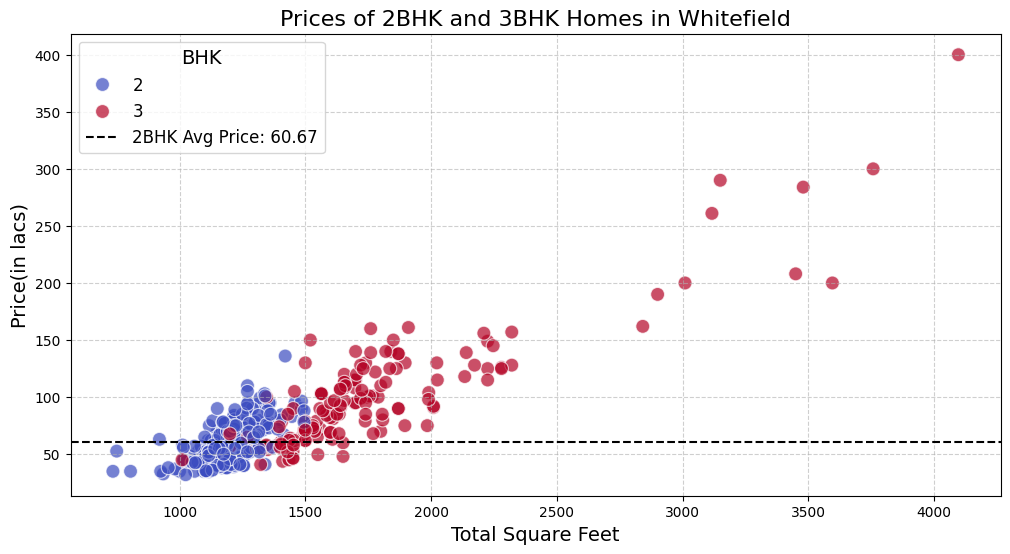

In [233]:
price_bhk_plot(df,'Whitefield')

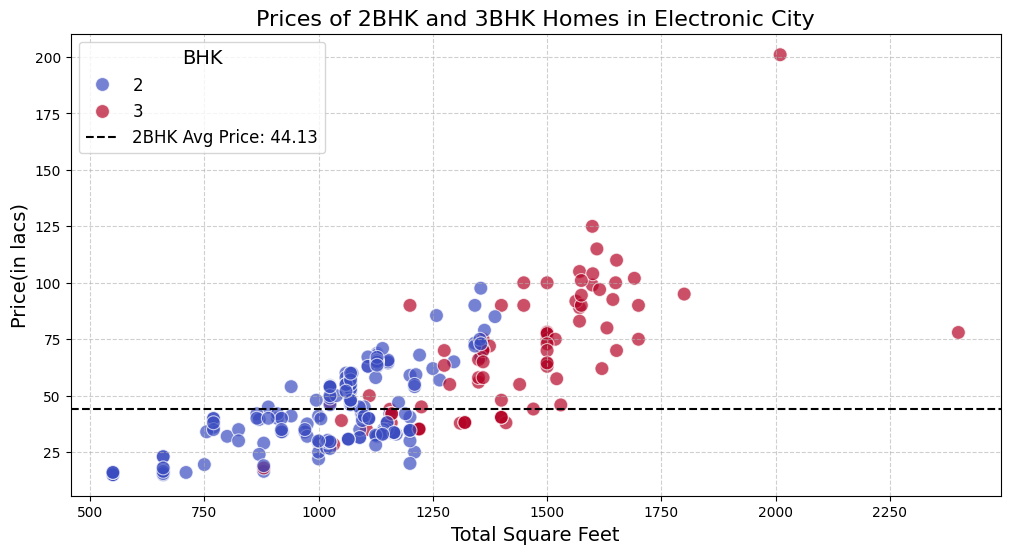

In [234]:
price_bhk_plot(df,'Electronic City')

In [235]:
def bhk_outlier(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3[location] == 1]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    bhk_3 = df_bhk_i(df,[3])
    bhk3_remove = bhk_3[bhk_3['price'] < avg_price_2BHK].index
    df.drop(bhk3_remove,inplace=True)
    return df

In [400]:
df11 = df.copy()

In [402]:
df['Koramangala'].sum()

44

In [404]:
bhk_outlier(df11,'Koramangala')['Koramangala'].sum()

40

In [368]:
def bhk_outlier_check(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3[location] == 1]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    bhk_3 = df_bhk_i(df,[3])
    bhk3_remove = bhk_3[bhk_3['price'] < avg_price_2BHK].index
    # df.drop(bhk3_remove,inplace=True)
    return bhk3_remove

In [352]:
locations = ['Koramangala','Electronic City','Whitefield']

In [392]:
def remove_outlier_for_all(df):
    answer = np.array([])
    locations = ['Koramangala','Electronic City','Whitefield']
    for i in locations:
        bhk3_remove = bhk_outlier_check(df,i)
        answer = np.append(answer,bhk3_remove.values)
        # df.drop(index=bhk3_remove,inplace=True)
    return answer

In [393]:
df10 = df.copy()

In [394]:
ans = remove_outlier_for_all(df10)

In [395]:
ans

array([2.0000e+00, 3.0000e+00, 8.0000e+00, ..., 1.3151e+04, 1.3161e+04,
       1.3194e+04])

In [399]:
for i in ans: 
    print(i)
print(len(ans))

2.0
3.0
8.0
10.0
16.0
17.0
25.0
27.0
29.0
31.0
33.0
38.0
41.0
51.0
52.0
54.0
71.0
81.0
84.0
90.0
93.0
95.0
97.0
104.0
109.0
111.0
114.0
115.0
122.0
124.0
129.0
132.0
136.0
137.0
146.0
148.0
150.0
158.0
164.0
165.0
167.0
171.0
172.0
173.0
189.0
196.0
199.0
202.0
203.0
204.0
209.0
210.0
211.0
212.0
216.0
217.0
219.0
232.0
240.0
242.0
244.0
258.0
263.0
264.0
271.0
275.0
276.0
278.0
280.0
281.0
282.0
284.0
293.0
299.0
300.0
304.0
310.0
323.0
326.0
327.0
335.0
343.0
348.0
357.0
374.0
375.0
382.0
395.0
409.0
410.0
421.0
431.0
432.0
437.0
438.0
439.0
441.0
444.0
451.0
452.0
456.0
479.0
493.0
496.0
497.0
498.0
512.0
514.0
528.0
530.0
532.0
536.0
537.0
538.0
539.0
543.0
548.0
560.0
562.0
563.0
570.0
573.0
584.0
589.0
591.0
592.0
593.0
597.0
602.0
613.0
616.0
618.0
619.0
620.0
623.0
630.0
631.0
640.0
645.0
647.0
648.0
650.0
653.0
657.0
662.0
663.0
665.0
672.0
676.0
680.0
691.0
694.0
695.0
698.0
704.0
705.0
706.0
707.0
711.0
712.0
715.0
729.0
746.0
764.0
766.0
774.0
775.0
780.0
785.0
790.0
794.0


In [398]:
df.drop(index = ans)

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2,3247.863248,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2732.0,4.0,204.00,4,7467.057101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,1715.0,3.0,112.00,3,6530.612245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13196,3453.0,4.0,231.00,5,6689.834926,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13198,1141.0,2.0,60.00,2,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13199,4689.0,4.0,488.00,4,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


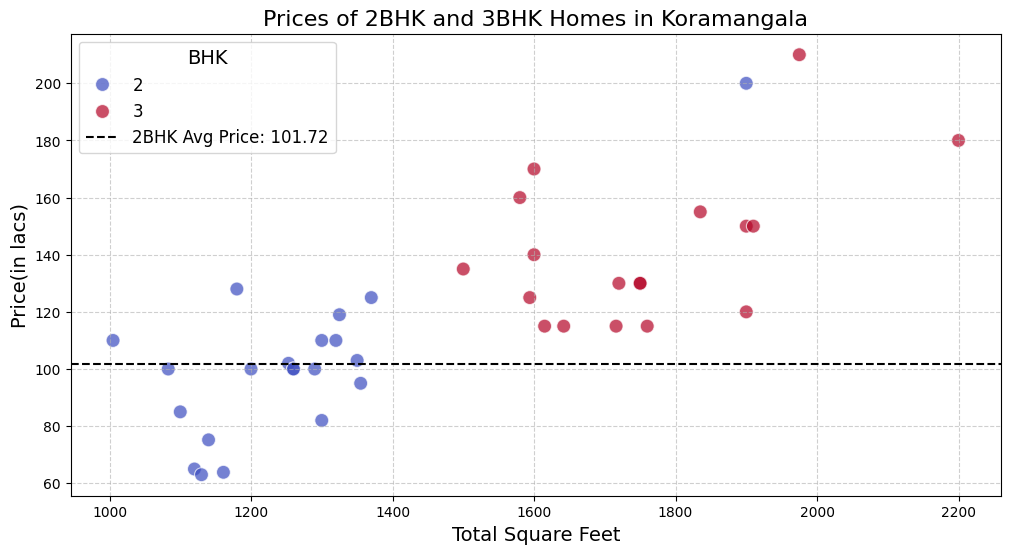

In [373]:
price_bhk_plot(ans,'Koramangala')

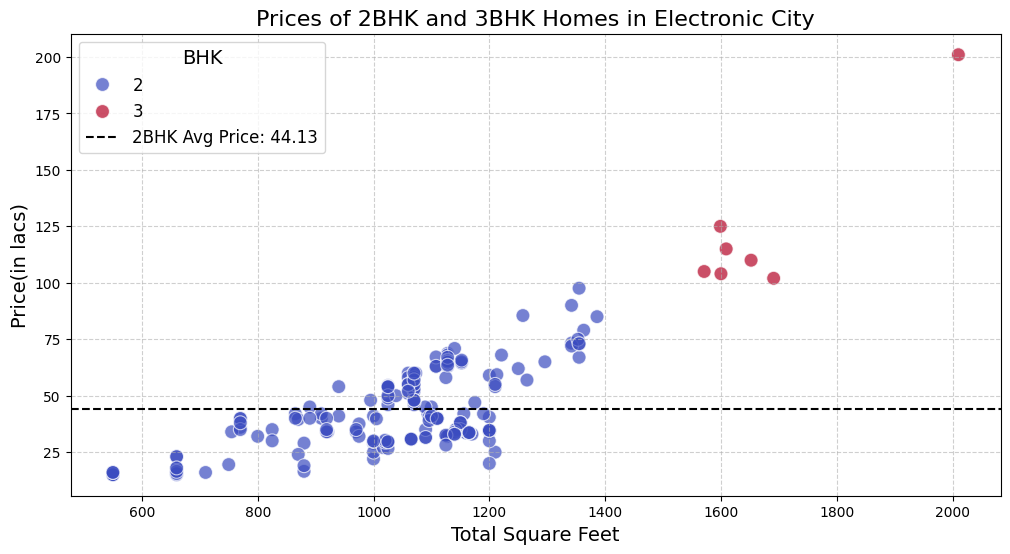

In [372]:
price_bhk_plot(ans,'Electronic City')

In [236]:
df3 = df.copy()

In [237]:
bhk_outlier(df3,'Electronic City')

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,1715.0,3.0,112.00,3,6530.612245,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13196,3453.0,4.0,231.00,5,6689.834926,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13198,1141.0,2.0,60.00,2,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13199,4689.0,4.0,488.00,4,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


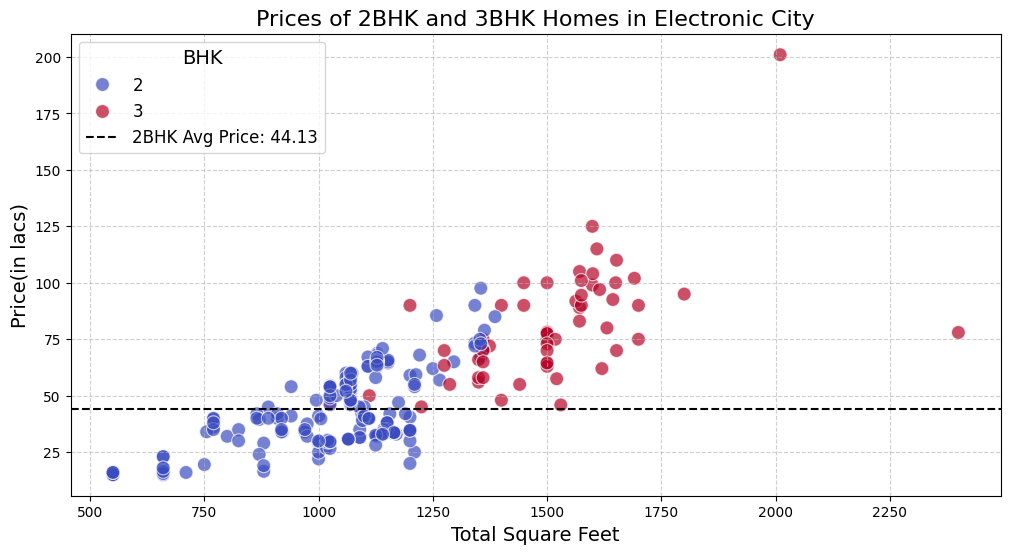

In [238]:
price_bhk_plot(bhk_outlier(df3,'Electronic City'),'Electronic City')

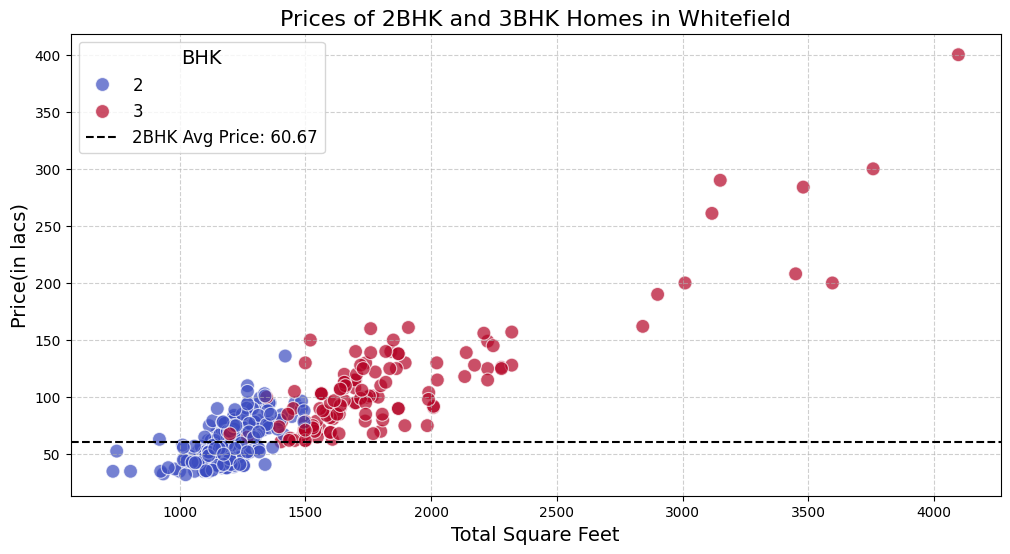

In [239]:
price_bhk_plot(bhk_outlier(df3,'Whitefield'),'Whitefield')

In [240]:
locations = df.columns[5:]
locations

Index([' Devarachikkanahalli', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

In [250]:
def remove_outlier_for_all(df):
    locations = df.columns[5:]
    for i in locations:
        bhk_outlier(df,i)
    return df
    

In [251]:
df3 = df.copy()

In [252]:
remove_outlier_for_all(df3)

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2,3247.863248,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2732.0,4.0,204.00,4,7467.057101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,1262.0,2.0,47.00,2,3724.247227,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13196,3453.0,4.0,231.00,5,6689.834926,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13198,1141.0,2.0,60.00,2,5258.545136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13199,4689.0,4.0,488.00,4,10407.336319,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


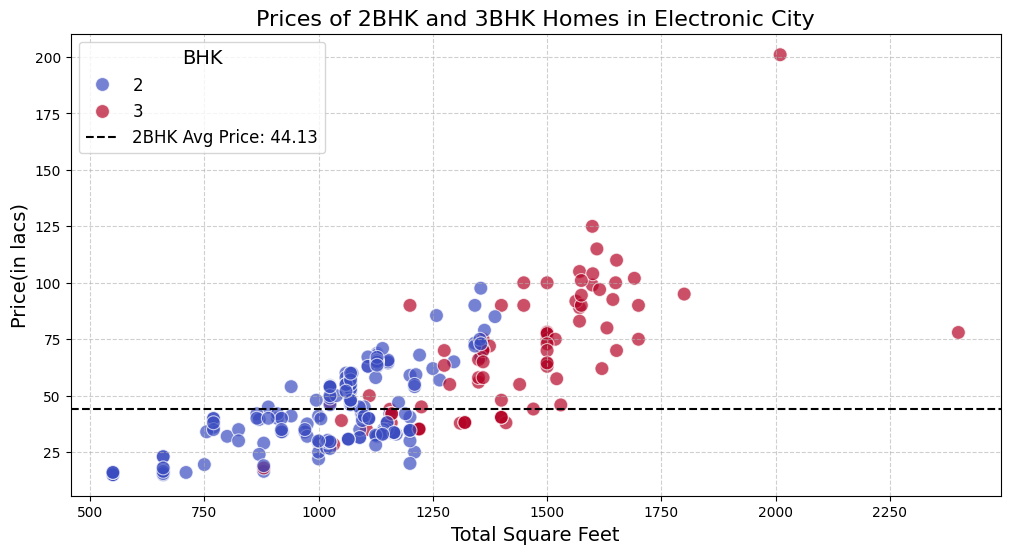

In [245]:
price_bhk_plot(df,'Electronic City')

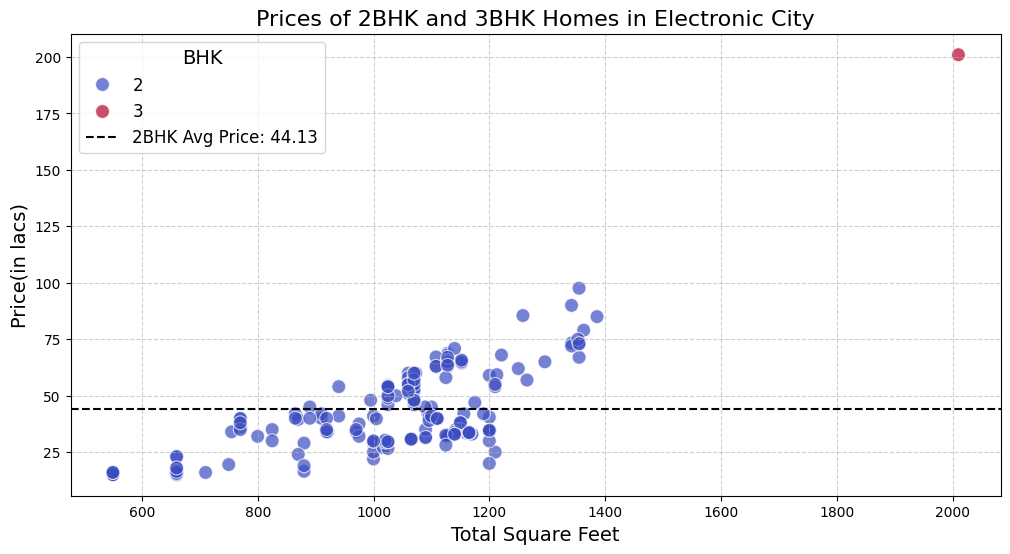

In [253]:
price_bhk_plot(remove_outlier_for_all(df3),'Electronic City')

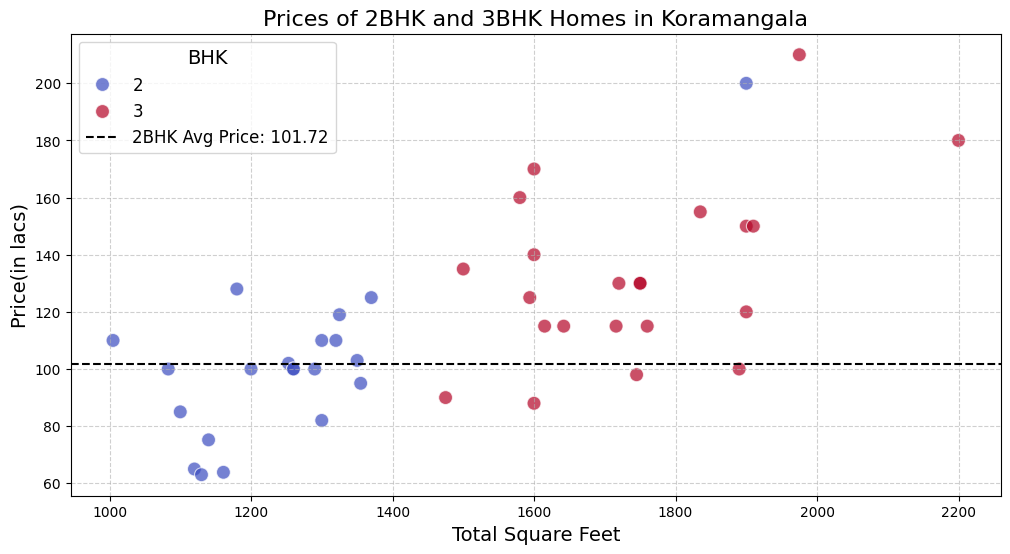

In [268]:
price_bhk_plot(df,'Koramangala')

In [315]:
df3 = df.copy()

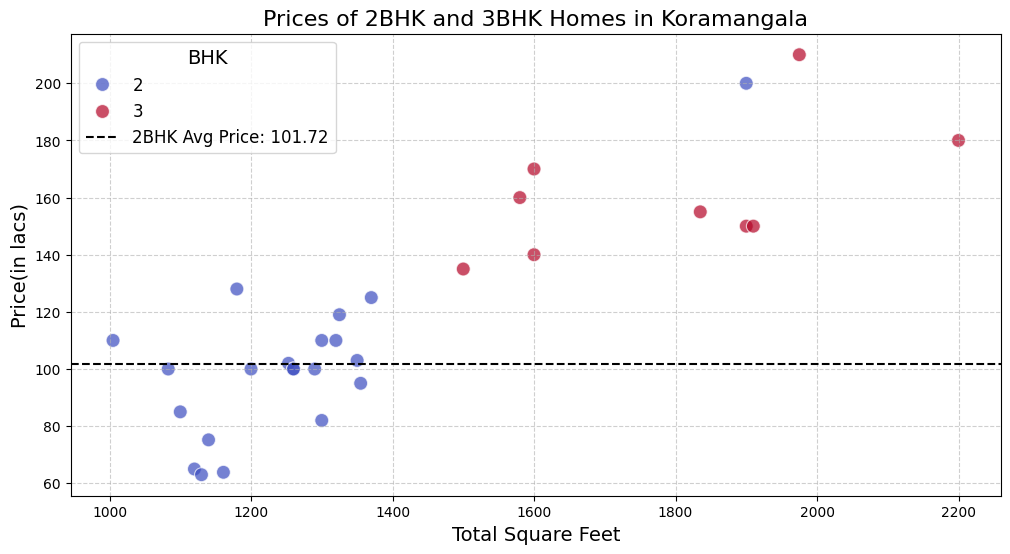

In [270]:
price_bhk_plot(remove_outlier_for_all(df3),'Koramangala')

In [344]:
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
X = df.drop(columns=['price','price_per_sqft'])

In [347]:
X

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,1715.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13196,3453.0,4.0,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13198,1141.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13199,4689.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
y = df['price']

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [350]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [351]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_clf.predict(X_test))

0.6847392962694001